# Bank customer churn

## 1. Business Problem

### About Dataset
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

### Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

## 2. EXPLORE DATA

### 2.1. INPUT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/mac/Desktop/Project/bank_customer_churn/Customer-Churn-Records.csv'

df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [2]:
df.shape

(10000, 18)

In [3]:
df_info = pd.DataFrame(df.dtypes,columns = ['Dtypes'])
df_info['unique'] = df.nunique().values
df_info['null'] = df.isnull().sum().values
print(df_info)

                     Dtypes  unique  null
RowNumber             int64   10000     0
CustomerId            int64   10000     0
Surname              object    2932     0
CreditScore           int64     460     0
Geography            object       3     0
Gender               object       2     0
Age                   int64      70     0
Tenure                int64      11     0
Balance             float64    6382     0
NumOfProducts         int64       4     0
HasCrCard             int64       2     0
IsActiveMember        int64       2     0
EstimatedSalary     float64    9999     0
Exited                int64       2     0
Complain              int64       2     0
Satisfaction Score    int64       5     0
Card Type            object       4     0
Point Earned          int64     785     0


## 
Ở đây thấy cột Rownumber, customerid, surname không có ảnh hưởng đến chất lượng dữ liệu nên có thể bỏ 3 cột này. 

Trong Tập dữ liệu không có bản ghi nào là null, nên đầo sâu thêm chất lượng dữ liệu và loại bỏ các yếu tố gây nhiễu

### 2.1. CLEAN DATA

In [4]:
df = df.drop(['RowNumber','Surname'],axis = 1)

In [5]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
# tính R F M

#tính R (recency)

df['Tenure'].describe()


#tính F (frequency)

df['NumOfProducts'].describe()

# tính  Moneyy

df['Point Earned'].describe()



count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: Point Earned, dtype: float64

In [7]:
df_customer  = df.groupby(['CustomerId']).agg(
    {
        'Tenure' : 'max',
        'NumOfProducts' : 'max',
        'Point Earned' : 'sum'
    }
)

df_customer.head()

,Tenure,NumOfProducts,Point Earned
CustomerId,,,
15565701,9,1,515
15565706,1,1,298
15565714,1,2,308
15565779,6,1,545
15565796,10,1,701


In [8]:
df_customer.rename(columns = {'Tenure' : 'Recency','NumOfProducts' : 'Frequency', 'Point Earned': 'Moneypoint'},inplace= True)
df_customer.head()

,Recency,Frequency,Moneypoint
CustomerId,,,
15565701,9,1,515
15565706,1,1,298
15565714,1,2,308
15565779,6,1,545
15565796,10,1,701


/var/folders/h5/nmfc3kr55375y_h4_5k7n7nh0000gn/T/ipykernel_1523/658941342.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer['Recency'], ax  = ax[0])
/var/folders/h5/nmfc3kr55375y_h4_5k7n7nh0000gn/T/ipykernel_1523/658941342.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cust

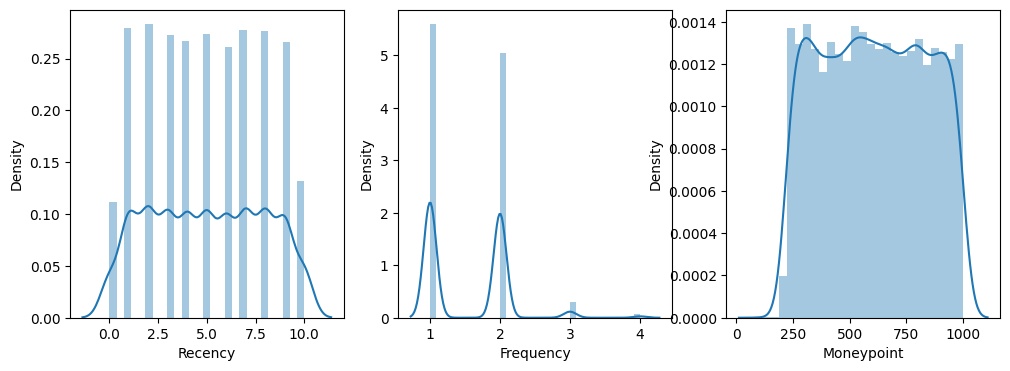

In [9]:
# vẽ  phân  phối  để  kiểm  tra  

fig, ax = plt.subplots(1,3, figsize  = (12,4))
sns.distplot(df_customer['Recency'], ax  = ax[0])
sns.distplot(df_customer['Frequency'], ax  = ax[1])
sns.distplot(df_customer['Moneypoint'], ax  = ax[2])
plt.show()

In [10]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customer[x], ax=ax[0,0])
    sns.distplot(np.log(df_customer[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customer[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customer[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customer[x].skew().round(2))
    print(np.log(df_customer[x]).skew().round(2))
    print(np.sqrt(df_customer[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customer[x])[0]).skew().round(2))

/var/folders/h5/nmfc3kr55375y_h4_5k7n7nh0000gn/T/ipykernel_1523/3206387938.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer[x], ax=ax[0,0])
/var/folders/h5/nmfc3kr55375y_h4_5k7n7nh0000gn/T/ipykernel_1523/3206387938.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_cust

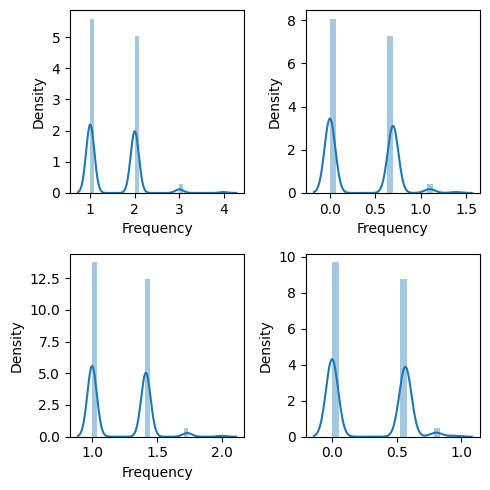

0.75
0.24
0.42
0.13


In [11]:
analyze_skewness('Frequency')

/var/folders/h5/nmfc3kr55375y_h4_5k7n7nh0000gn/T/ipykernel_1523/3206387938.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer[x], ax=ax[0,0])
/var/folders/h5/nmfc3kr55375y_h4_5k7n7nh0000gn/T/ipykernel_1523/3206387938.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_cust

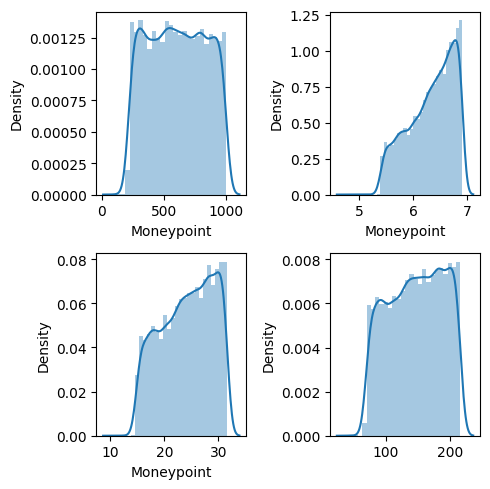

0.01
-0.52
-0.24
-0.12


In [12]:
analyze_skewness('Moneypoint')

In [34]:
# tiến  hành  transform  dữ  liệuu

df_customer_t  = pd.DataFrame()
df_customer_t['Recency'] = df_customer['Recency']
df_customer_t['Frequency'] = stats.boxcox(df_customer['Frequency'])[0]
df_customer_t['Moneypoint'] = stats.boxcox(df_customer['Moneypoint'])[0]
                                         

In [26]:
df_customer_t.head()

,Recency,Frequency,Moneypoint
CustomerId,,,
15565701,9,0.000000,131.926034
15565706,1,0.000000,87.844464
15565714,1,0.568126,90.032067
15565779,6,0.000000,137.582063
15565796,10,0.000000,165.779124


In [35]:
#tiến hành scale dữ liệu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customer_t)

df_customer_t = scaler.transform(df_customer_t)
df_customer_t                                 

array([[ 1.37868567, -0.97087941, -0.35494171],
       [-1.38753759, -0.97087941, -1.41017094],
       [-1.38753759,  0.94501998, -1.35780386],
       ...,
       [ 1.37868567, -0.97087941,  0.17532494],
       [-1.38753759, -0.97087941, -0.27346088],
       [-0.69598177, -0.97087941, -0.86115398]])

In [36]:
pd.DataFrame(df_customer_t).head()

,0,1,2
0,1.378686,-0.970879,-0.354942
1,-1.387538,-0.970879,-1.410171
2,-1.387538,0.945020,-1.357804
3,0.341352,-0.970879,-0.219547
4,1.724464,-0.970879,0.455437


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

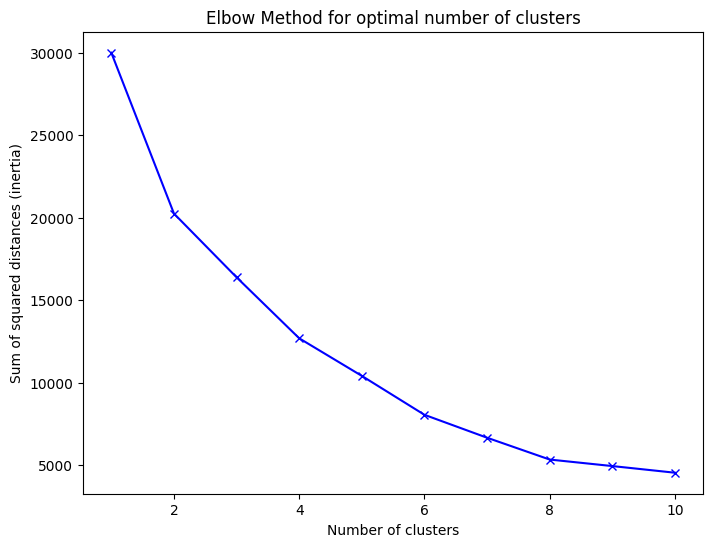

In [37]:
# phân cụm

from sklearn.cluster import KMeans

# Giả sử df_scaled là dữ liệu đã được chuẩn hóa
range_n_clusters = range(1, 11)
inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_customer_t)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (inertia)')
plt.title('Elbow Method for optimal number of clusters')
plt.show()

In [29]:
model = KMeans(n_clusters = 4,random_state = 42)
model.fit(df_customer_t)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [39]:
df_customer['cluster'] = model.labels_
df_customer.head()

,Recency,Frequency,Moneypoint,cluster
CustomerId,,,,
15565701,9,1,515,1
15565706,1,1,298,2
15565714,1,2,308,3
15565779,6,1,545,1
15565796,10,1,701,1


In [48]:
df_customer['cluster'].value_counts()

cluster
0    2586
2    2560
1    2524
3    2330
Name: count, dtype: int64

In [49]:
df_customer.groupby('cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'Moneypoint': 'mean'
        
    }
).round(2)

,Recency,Frequency,Moneypoint
cluster,,,
0,5.14,2.08,789.02
1,7.50,1.00,587.19
2,2.49,1.00,631.65
3,4.95,2.08,397.27


## Note

1. Điểm tín dụng nhóm 0 nhiều nhất  trong các nhóm còn lại, nhóm này nắm giữ thẻ tín dụng trung bình là 5,14 năm và thưởng sử cụng 2,08 sản phẩm

-> Nhóm này có đặc điểm coi thẻ tin dụng của ngân hàng này là thẻ tín dụng chính nên cần chăm sóc và chương trình chi ân đặc biệt cho khác hàng này 

2. Điểm tín dụng nhóm 1 là 587.19 ở mức nhóm giữa, nhưng nhóm này nắm giữ thẻ tín dụng trung là 7.50 năm, sản phẩm sử dụng là 1 sản phẩm

-> Có thể thấy nhóm này có thẻ tín dụng nhiều năm nhưng sử dụng không nhiều sản phẩm, vậy nên cần gợi nhớ và nhắc nhớ cient

3. Điểm tín dụng nhóm 2 là 631.65 thấp hơn nhóm 1 và cao hơn nhóm còn lại, thời gian nắm giữ thẻ tín dụng là 2.49 năm và sản phẩm sử dụng là 1 sản phẩm

-> Có thể thấy nhóm này đang có dấu hiệu thích dòng thẻ tín dụng này và tin tưởng vào dòng thẻ này nên cần tiếp tục có chương trình marketing giữ chân khách hàng.

4. Điểm tín dụng nhóm 3 là 397,27 thấp nhất so với nhóm khác, thời gian nắm giữ thẻ tín dụng của nhóm này là 4.95 năm và sản phẩm sử dụng là 2.08 sản phẩm

-> Ở nhóm này, tuy thời gian năm giữ cũng cao và sản phẩm sử dụng cũng nhiều nhưng điểm tín dụng thấp nhất khả năng khác hàng chi tiêu ít hoặc vi phạm chính sách thẻ tín dụng vậy nên có truyền thông lại khách hàng để khách hàng nắm rõ sản phầm và chi tiêu nhiều hơn.